In [ ]:
import os
import random
import numpy as np
import scipy.io
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.utils import to_categorical
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,f1_score

Downloading Oxford-102-Flowers Dataset 

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-04-21 10:07:35--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-04-21 10:07:35--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  27.5MB/s    in 13s     

2022-04-21 10:07:48 (26.1 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-04-21 10:07:58--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

Loading data 

In [ ]:
img_labels = scipy.io.loadmat("imagelabels.mat")   #Loading data stored in the MAT-file into a simple Python data structure
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [ ]:
images = list()
labels = list()
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  labels.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (100,100))
  images.append(resized)


In [ ]:
for i in range(0,len(labels)):
  labels[i]=int(labels[i])

Sample Images 

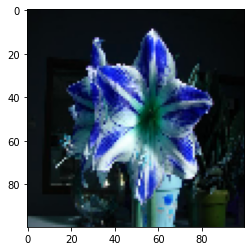

In [ ]:
random_ind=[]
random_ind=random.sample(list(images), 1)

for k in random_ind:
  plt.imshow(np.asarray(k))  
  plt.show

Downsampling 8189 images --> 4080 images 
After downnsampling , each class have total 40 images 

In [ ]:
new_label = Counter(labels)

In [ ]:
new_label 

Counter({0: 40,
         1: 60,
         2: 40,
         3: 56,
         4: 65,
         5: 45,
         6: 40,
         7: 85,
         8: 46,
         9: 45,
         10: 87,
         11: 87,
         12: 49,
         13: 48,
         14: 49,
         15: 41,
         16: 85,
         17: 82,
         18: 49,
         19: 56,
         20: 40,
         21: 59,
         22: 91,
         23: 42,
         24: 41,
         25: 41,
         26: 40,
         27: 66,
         28: 78,
         29: 85,
         30: 52,
         31: 45,
         32: 46,
         33: 40,
         34: 43,
         35: 75,
         36: 108,
         37: 56,
         38: 41,
         39: 67,
         40: 127,
         41: 59,
         42: 130,
         43: 93,
         44: 40,
         45: 196,
         46: 67,
         47: 71,
         48: 49,
         49: 92,
         50: 258,
         51: 85,
         52: 93,
         53: 61,
         54: 71,
         55: 109,
         56: 67,
         57: 114,
         58: 67,


In [ ]:
import matplotlib.pyplot as plt

class_=list()
class_count=list()
for i in range(len(new_label)):
  class_.append(i)
  class_count.append(new_label[i])


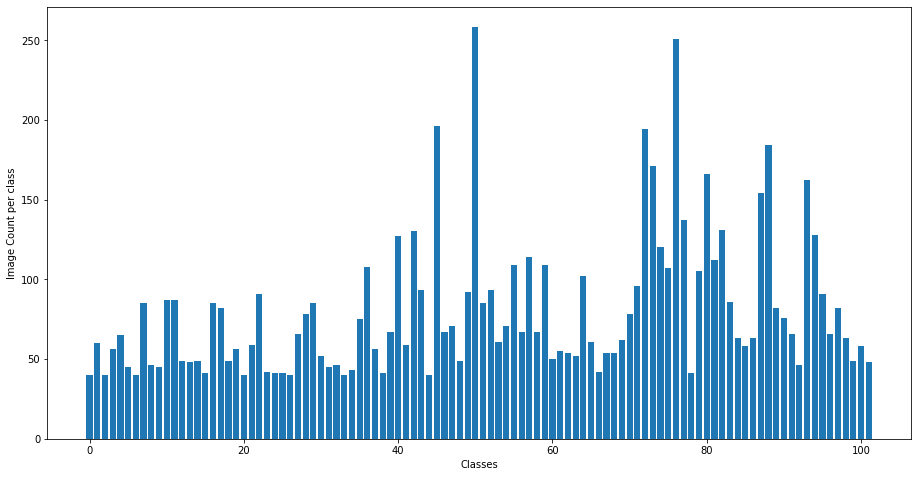

In [ ]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(class_,class_count)
plt.xlabel("Classes")
plt.ylabel("Image Count per class")
plt.show()

In [ ]:
ind = list()
for i in range(len(new_label)):
  if(new_label[i]>=100):
    ind.append(i)

In [ ]:
len(ind)

23

In [ ]:
IMG = list()
LAB = list()
i=0
while(i<102):
  # extracting data of each class separately
  l=list()
  p=list()
  for j in range(0,len(labels)):
    if(labels[j]==i):
      l.append(images[j])
      p.append(labels[j])
  IMG.append(l)
  LAB.append(p)
  i+=1


In [ ]:
lab=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in LAB[i]:
    lab.append(j)


In [ ]:
img1=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in  IMG[i]:
    img1.append(j)


In [ ]:
print(len(img1))
print(len(lab))

3375
3375


Spliting data in

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(img1,lab,stratify=lab, test_size=0.2,random_state=1)

In [ ]:
print(len(train_x))
print(len(test_x))

2700
675


K Nearst Neighbour Classification 

In [ ]:
knn_x = list()
for i in train_x:
  knn_x.append(i.flatten())

knn_test_x = list()
for j in test_x:
  knn_test_x.append(j.flatten())

knn_y = train_y
knn_test_y = test_y

Feature Scaling 

In [ ]:
scaler = StandardScaler()
knn_x = scaler.fit_transform(knn_x)
knn_test_x = scaler.transform(knn_test_x)

In [ ]:
l=list()
for i in range(1,41):
  l.append(i)

In [ ]:
error = list()
# Calculating error for K values between 1 and 40
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knn_x, knn_y)
    pred_i = knn.predict(knn_test_x)
    error.append(np.mean(pred_i != knn_test_y))
    

Text(0, 0.5, 'Mean Error')

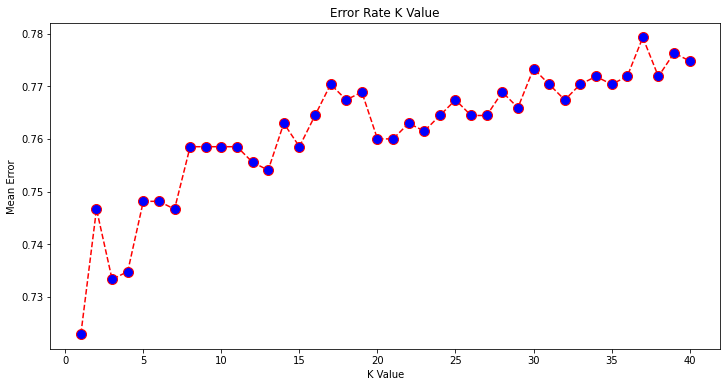

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,41), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
param_grid ={'n_neighbors':l,'p':[1,2]} 

knn_cv_b = KNeighborsClassifier()
knn_gscv_b = GridSearchCV(knn_cv_b,param_grid,cv=5)   # dividing into 5 folds 
knn_gscv_b.fit(knn_x,knn_y)

print("Best parameter value : ",knn_gscv_b.best_params_)


In [ ]:
k = knn_gscv_b.best_params_['n_neighbors']
p = knn_gscv_b.best_estimator_.get_params()['p']
if(p==1):print("Manhattan Distance")
else:print("Euclidean Distance")

In [ ]:
print(k)
print(p)

1
1


In [ ]:
# calling KNeighborsClassifier class
p_grid = {'n_neighbors':[k],'p':[p]} 
knn_cv = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_cv,p_grid,cv=5)
knn_gscv.fit(knn_x,knn_y) 


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1], 'p': [1]})

In [ ]:
# accuracy after cross validation 
cv_scores = cross_val_score(knn_cv ,knn_x,knn_y,cv=5)
print(cv_scores)
print('cv_scores mean : {}'.format(np.mean(cv_scores)))

[0.23518519 0.23888889 0.22592593 0.26111111 0.25555556]
cv_scores mean : 0.24333333333333332


In [ ]:
knn_test_ypred=knn_gscv.predict(knn_test_x)   # predict label with respect to given test data

In [ ]:
print("Accuracy of model :-",knn_gscv.score(knn_test_x, knn_test_y)*100)

Accuracy of model :- 32.0


In [ ]:
target_names = ["Class {}".format(i) for i in ind]
print(classification_report(knn_test_y,knn_test_ypred, target_names=target_names))

              precision    recall  f1-score   support

    Class 36       0.25      0.73      0.37        22
    Class 40       0.38      0.24      0.29        25
    Class 42       0.18      0.15      0.17        26
    Class 45       0.47      0.18      0.26        39
    Class 50       0.43      0.17      0.25        52
    Class 55       0.48      0.91      0.62        22
    Class 57       0.54      0.87      0.67        23
    Class 59       0.47      0.36      0.41        22
    Class 64       0.22      1.00      0.36        20
    Class 72       0.39      0.23      0.29        39
    Class 73       0.22      0.41      0.28        34
    Class 74       0.32      0.75      0.44        24
    Class 75       0.55      0.29      0.37        21
    Class 76       0.57      0.08      0.14        50
    Class 77       0.21      0.67      0.32        27
    Class 79       0.09      0.05      0.06        21
    Class 80       1.00      0.09      0.17        33
    Class 81       0.14    

In [ ]:
no_neighbors = np.arange(1, 41)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))


In [ ]:
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(knn_x,knn_y)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(knn_x, knn_y)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(knn_test_x, knn_test_y)

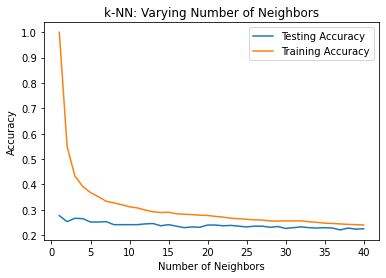

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()